## Dashboard 


In [6]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# Load and clean data
df = pd.read_csv(r"D:\Internship\Spangles info tech\world_population_data.csv")
for col in ['Land Area (Km²)', 'Net Change', 'Yearly Change', 'Urban Pop %', 'growth rate', 'world percentage']:
    df[col] = df[col].replace({',': '', '%': ''}, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.fillna(df.mean(numeric_only=True), inplace=True)

# App setup
app = Dash(__name__)
server = app.server  # for deployment

# Layout
app.layout = html.Div([
    html.H1("🌍 World Population Dashboard", style={'textAlign': 'center'}),

    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': c, 'value': c} for c in sorted(df['country'].unique())],
        value='India',
        style={'width': '50%', 'margin': 'auto'}
    ),

    dcc.Graph(id='line-graph'),
    dcc.Graph(id='pie-chart'),
    dcc.Graph(id='scatter-plot'),
])

# Callbacks
@app.callback(
    Output('line-graph', 'figure'),
    Input('country-dropdown', 'value')
)
def update_line_chart(selected_country):
    row = df[df['country'] == selected_country].iloc[0]
    years = [1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022, 2023, 2024]
    pops = [row[f"{year} population"] for year in years]
    fig = px.line(x=years, y=pops, markers=True,
                  labels={'x': 'Year', 'y': 'Population'},
                  title=f"{selected_country} Population Over Time")
    return fig

@app.callback(
    Output('pie-chart', 'figure'),
    Input('country-dropdown', 'value')
)
def update_pie(_):
    continent_pop = df.groupby('continent')['2024 population'].sum().reset_index()
    fig = px.pie(continent_pop, values='2024 population', names='continent',
                 title='Population Share by Continent (2024)', hole=0.4)
    return fig

@app.callback(
    Output('scatter-plot', 'figure'),
    Input('country-dropdown', 'value')
)
def update_scatter(_):
    fig = px.scatter(df, x='Fert. Rate', y='Med. Age', color='continent',
                     hover_name='country',
                     title='Fertility Rate vs Median Age by Country')
    return fig

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


## Bar chart


Average values:
 Rank                1.175000e+02
2024 population     3.487407e+07
2023 population     3.437442e+07
2022 population     3.407441e+07
2020 population     3.350107e+07
2015 population     3.172996e+07
2010 population     2.984524e+07
2000 population     2.626947e+07
1990 population     2.271022e+07
1980 population     1.898462e+07
1970 population     1.578691e+07
Land Area (Km²)     5.559568e+05
density (km²)       4.512821e+02
Yearly Change       9.423932e-01
Net Change          3.002291e+05
Fert. Rate          2.332051e+00
Med. Age            3.167949e+01
Urban Pop %         5.987037e+01
growth rate         9.736752e-01
world percentage    4.270940e-01
dtype: float64


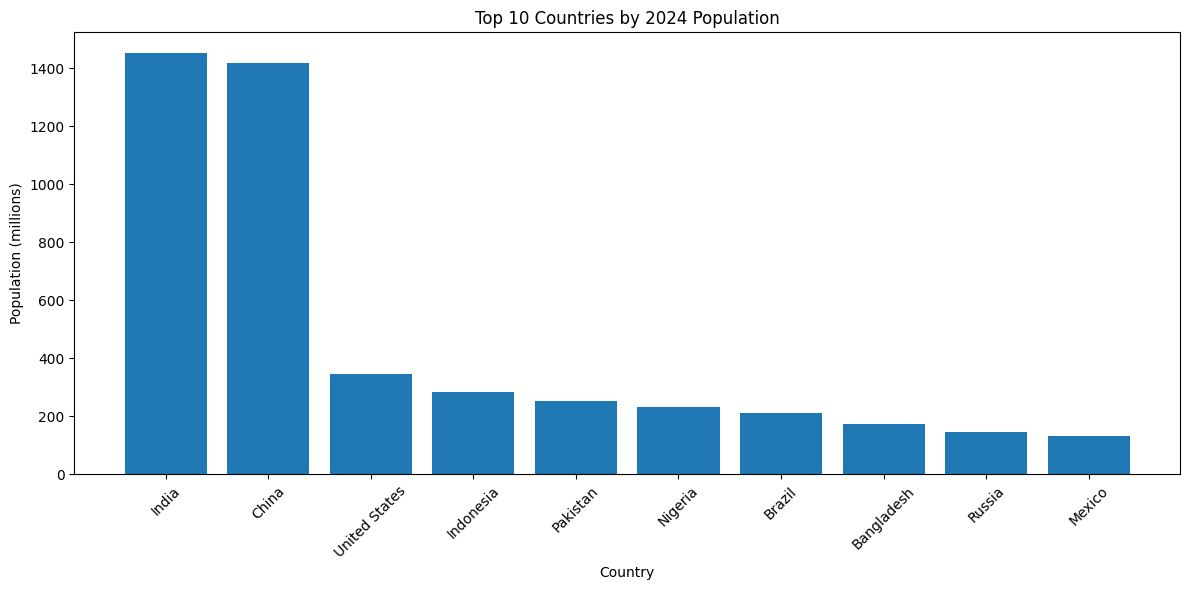

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"D:\Internship\Spangles info tech\world_population_data.csv")

# Clean object columns with commas and percentages
for col in ['Land Area (Km²)', 'Net Change', 'Yearly Change', 'Urban Pop %', 'growth rate', 'world percentage']:
    df[col] = df[col].replace({',': '', '%': ''}, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values with mean (only numeric columns)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Print average value of each column (optional)
avg_values = df.mean(numeric_only=True)
print("Average values:\n", avg_values)

# Plot: Top 10 Countries by 2024 Population
top10 = df.sort_values(by='2024 population', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top10['country'], top10['2024 population'] / 1e6)  # In millions
plt.title('Top 10 Countries by 2024 Population')
plt.xlabel('Country')
plt.ylabel('Population (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Pie Chart

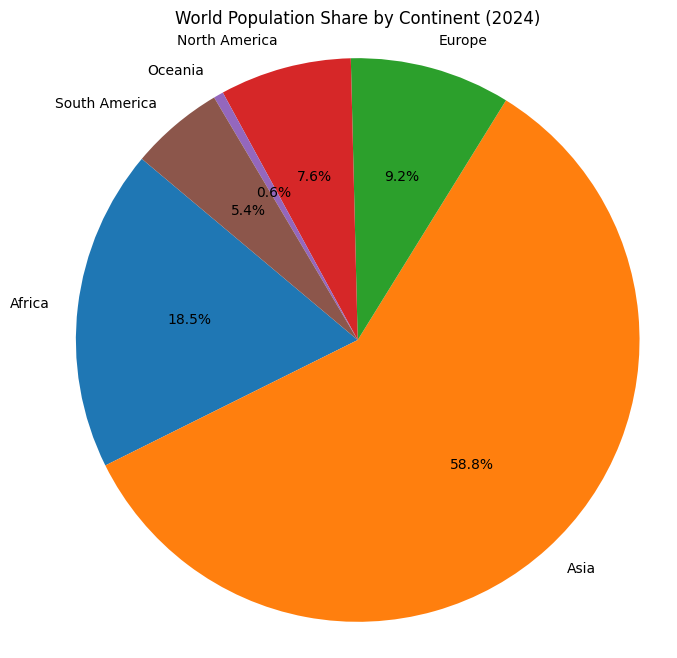

In [3]:
import matplotlib.pyplot as plt

# Group population by continent
continent_pop = df.groupby('continent')['2024 population'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(continent_pop, labels=continent_pop.index, autopct='%1.1f%%', startangle=140)
plt.title('World Population Share by Continent (2024)')
plt.axis('equal')
plt.show()


## Line chart

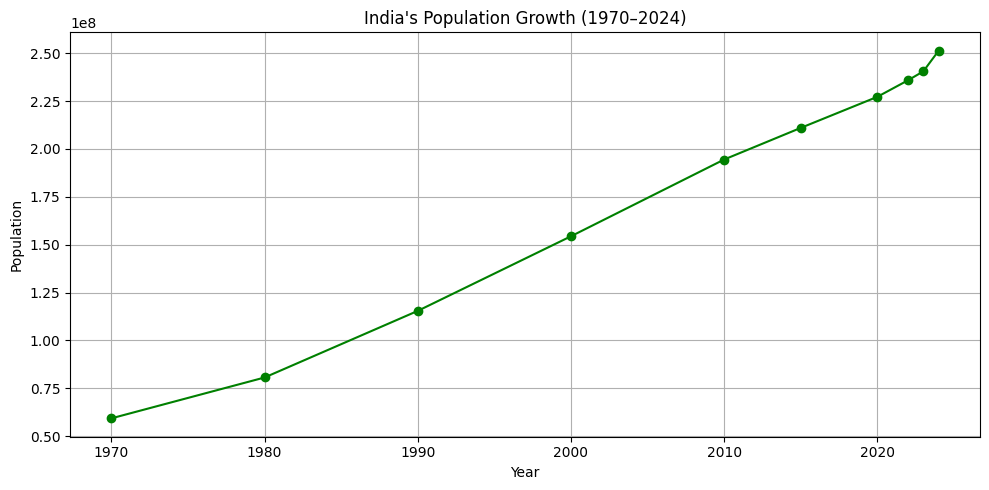

In [4]:
# Select India's population over the years
india = df[df['country'] == 'Pakistan'].iloc[0]
years = [1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022, 2023, 2024]
pop_values = [india[f'{year} population'] for year in years]

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(years, pop_values, marker='o', linestyle='-', color='green')
plt.title("India's Population Growth (1970–2024)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.tight_layout()
plt.show()


## Scatter plot


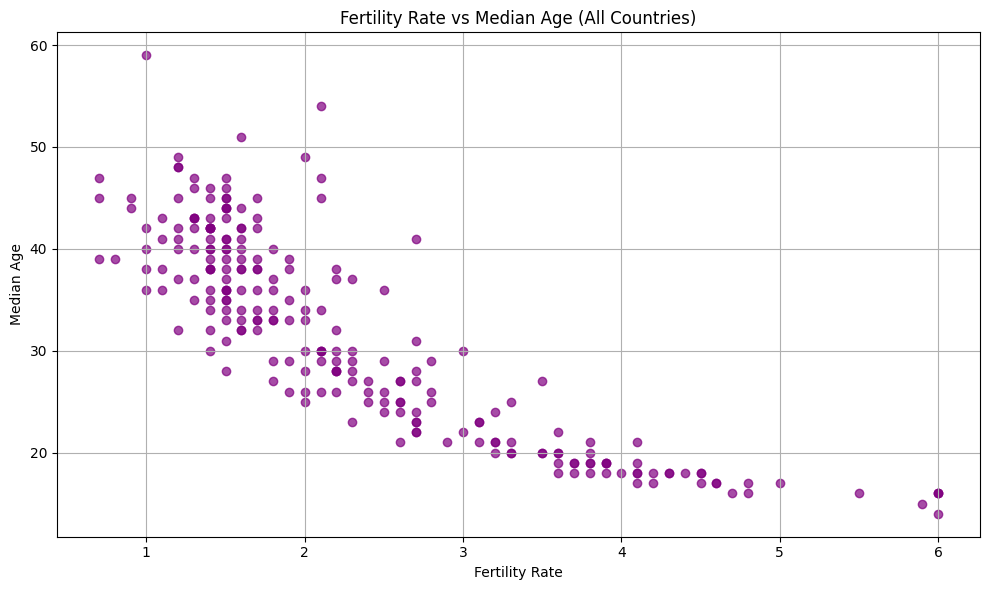

In [5]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Fert. Rate'], df['Med. Age'], alpha=0.7, color='purple')
plt.title('Fertility Rate vs Median Age (All Countries)')
plt.xlabel('Fertility Rate')
plt.ylabel('Median Age')
plt.grid(True)
plt.tight_layout()
plt.show()
